# 4.1

In [35]:
# 4.1
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
import random
import statsmodels.api as sm
%matplotlib inline

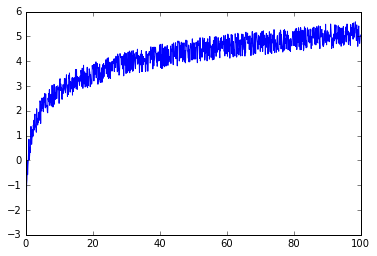

In [3]:
x = [x/10. for x in xrange(1,1000)]
beta0 = 0
beta1 = 1
y = [beta0 + beta1 * math.log(n) + random.random() for n in x]
df = pd.DataFrame({'y':y, 'x':x})
plt.plot(df.x, df.y);

In [4]:
df['constant'] = 1
df['x^2'] = df.x**2
df['log(x)'] = df.x.apply(lambda x: math.log(x))

In [5]:
# Quadratic
X = df[['constant', 'x^2']]
y = df.y
model = sm.OLS(y, X)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.512
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     1047.
Date:                Tue, 11 Oct 2016   Prob (F-statistic):          1.31e-157
Time:                        15:05:16   Log-Likelihood:                -1091.4
No. Observations:                 999   AIC:                             2187.
Df Residuals:                     997   BIC:                             2197.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
constant       3.2954      0.034     96.116      0.000         3.228     3.363
x^2            0.0002   7.67e-06     32.358      0.000         0.000     0.000
==============================================================================
Omnibus:                      505.274   Durbin-Watson:                   0.331
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3963.589
Skew:                          -2.188   Prob(JB):                         0.00
Kurtosis:                      11.722   Cond. No.                     6.71e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.71e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

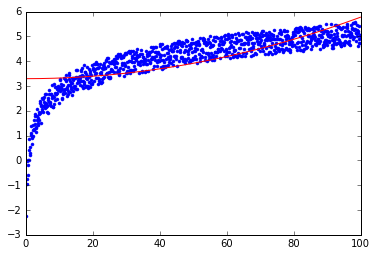

In [6]:
y_predict = fit.predict(X) 
plt.plot(df.x, df.y, 'b.', df.x, y_predict, 'r-');

In [7]:
# Logarithmic
X = df[['constant', 'log(x)']]
y = df.y
model = sm.OLS(y, X)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                 1.214e+04
Date:                Tue, 11 Oct 2016   Prob (F-statistic):               0.00
Time:                        15:05:17   Log-Likelihood:                -161.99
No. Observations:                 999   AIC:                             328.0
Df Residuals:                     997   BIC:                             337.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
constant       0.4841      0.034     14.145      0.000         0.417     0.551
log(x)         1.0083      0.009    110.195      0.000         0.990     1.026
==============================================================================
Omnibus:                      506.653   Durbin-Watson:                   2.106
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               56.148
Skew:                          -0.085   Prob(JB):                     6.42e-13
Kurtosis:                       1.851   Cond. No.                         15.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

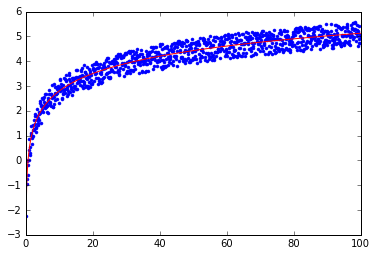

In [8]:
y_predict = fit.predict(X) 
plt.plot(df.x, df.y, 'b.', df.x, y_predict, 'r-');

# 4.2

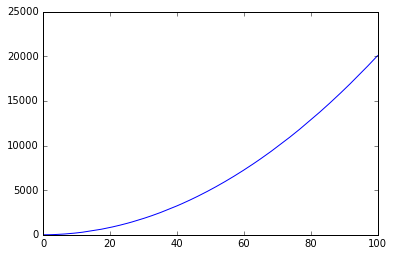

In [9]:
# 4.2

from sklearn.metrics import mean_squared_error

x = [x/10. for x in xrange(1,1000)]
beta0 = 0
beta1 = 1
beta2 = 2
y = [beta0 + beta1 * n + beta2 * n**2 + random.random() for n in x]
df = pd.DataFrame({'y':y, 'x':x})
plt.plot(df.x, df.y);

In [11]:
from sklearn.cross_validation import train_test_split

df['constant'] = 1
df['x^2'] = df.x**2
X_train, X_test, y_train, y_test = train_test_split(df[['constant', 'x', 'x^2']], df.y, test_size = 0.2)

In [12]:
X = X_train[['constant', 'x', 'x^2']]
y = y_train
model = sm.OLS(y, X)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.866e+11
Date:                Tue, 11 Oct 2016   Prob (F-statistic):               0.00
Time:                        15:05:26   Log-Likelihood:                -114.98
No. Observations:                 799   AIC:                             236.0
Df Residuals:                     796   BIC:                             250.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
constant       0.5231      0.030     17.364      0.000         0.464     0.582
x              0.9990      0.001    728.621      0.000         0.996     1.002
x^2            2.0000   1.31e-05   1.52e+05      0.000         2.000     2.000
==============================================================================
Omnibus:                      280.949   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.352
Skew:                          -0.058   Prob(JB):                     1.73e-09
Kurtosis:                       1.905   Cond. No.                     1.38e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.38e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
# Training MSE
y_predict = fit.predict(X) 
mean_squared_error(y, y_predict)

0.078076866112043466

In [14]:
# Testing MSE
X = X_test[['constant', 'x', 'x^2']]
y = y_test

y_predict = fit.predict(X) 
mean_squared_error(y, y_predict)

0.092635887001755859

# 4.3

In [22]:
# 4.3

for i in xrange(3,8):
    df['x^'+str(i)] = df.x**i
    
order = ['constant','x'] + list('x^'+str(i) for i in xrange(2,8))

In [23]:
order

['constant', 'x', 'x^2', 'x^3', 'x^4', 'x^5', 'x^6', 'x^7']

In [31]:
train_error = []
test_error = []
r2 = []
aic = []

for i in order:
    X_train, X_test, y_train, y_test = train_test_split(df[i], df.y, test_size = 0.2)
    
    model = sm.OLS(y_train, X_train)
    fit = model.fit()
    y_train_predict = fit.predict(X_train) 
    y_test_predict = fit.predict(X_test) 
    train_error.append(mean_squared_error(y_train, y_train_predict))
    test_error.append(mean_squared_error(y_test, y_test_predict))
    r2.append(fit.rsquared_adj)
    aic.append(fit.aic)


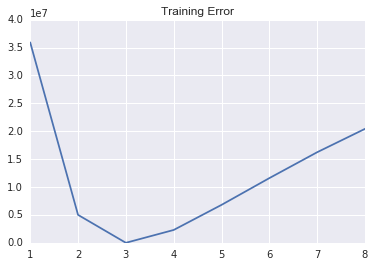

In [43]:
plt.plot(range(1,9), train_error)
plt.title("Training Error")

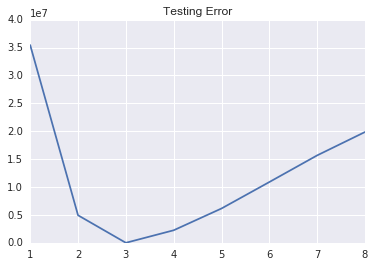

In [47]:
plt.plot(range(1,9), test_error)
plt.title("Testing Error")

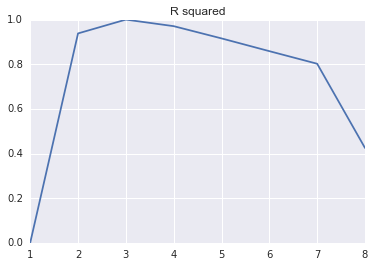

In [48]:
plt.plot(range(1,9), r2)
plt.title("R squared")

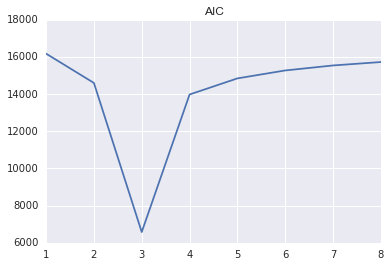

In [49]:
plt.plot(range(1,9), aic)
plt.title("AIC")

# 4.4

In [82]:
# 4.4
X = df[['constant', 'x', 'x^2', 'x^3', 'x^4', 'x^5', 'x^6', 'x^7']]
y = df.y
train_error = []
test_error = []

for i in xrange(5,105,5):
    X_train, X_test, y_train, y_test = train_test_split(X[:i], df.y[:i], test_size = 0.2)
    model = sm.OLS(y_train, X_train)
    fit = model.fit()
    y_train_predict = fit.predict(X_train) 
    y_test_predict = fit.predict(X_test) 
    train_error.append(mean_squared_error(y_train, y_train_predict))
    test_error.append(mean_squared_error(y_test, y_test_predict))


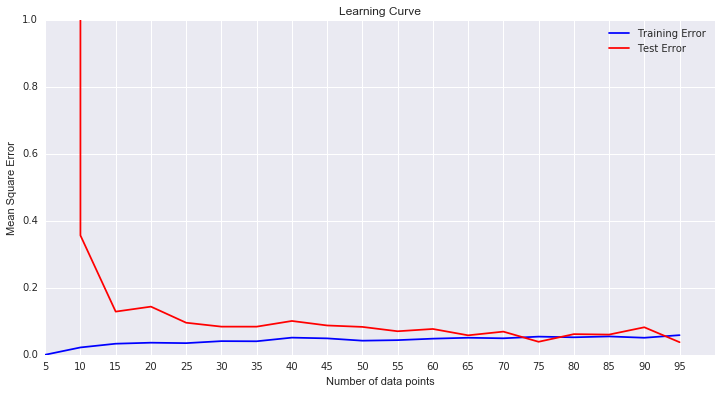

In [101]:
plt.figure(figsize=(12,6))
plt.plot(xrange(20), train_error, 'b', label = 'Training Error')
plt.plot(xrange(20), test_error, 'r', label = "Test Error")
plt.legend()
plt.xlabel('Number of data points')
plt.xticks(xrange(20), xrange(0,100,5))
plt.ylabel('Mean Square Error')
plt.xlim(1,20)
plt.ylim(0,1)
plt.title('Learning Curve');